<center>
    <h1> CardioRisk: Unraveling Patterns for Early Diagnosis Using Machine Learning </h1>
    <h2> Modeling : XGBoost </h2>
    <h4> Shruti Badrinarayanan </h4>
</center>

## 1. Load Train, Validation and Test Sets

In [ ]:
import pandas as pd

# Read the datasets from the CSV files
X_train = pd.read_csv('Split Data/X_train_pca.csv')
y_train = pd.read_csv('Split Data/y_train.csv').iloc[:, 0]

X_val = pd.read_csv('Split Data/X_val_pca.csv')
y_val = pd.read_csv('Split Data/y_val.csv').iloc[:, 0]

X_test = pd.read_csv('Split Data/X_test_pca.csv')
y_test = pd.read_csv('Split Data/y_test.csv').iloc[:, 0]

In [ ]:
X_train.drop(columns=['target'], inplace=True)
X_val.drop(columns=['target'], inplace=True)
X_test.drop(columns=['target'], inplace=True)

## 2. Baseline Model (Train Set)

To begin, we establish a baseline model using XGBoost with default hyperparameters. This model serves as a reference point to measure the impact of subsequent hyperparameter tuning.

Training Accuracy: 1.0000
Training Balanced Accuracy: 1.0000
Training Precision: 1.0000
Training Recall: 1.0000
Training F1 Score: 1.0000
Training ROC AUC: 1.0000
Training Log Loss: 0.0045

Training Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       315
         1.0       1.00      1.00      1.00       404

    accuracy                           1.00       719
   macro avg       1.00      1.00      1.00       719
weighted avg       1.00      1.00      1.00       719


Training Confusion Matrix:
[[315   0]
 [  0 404]]


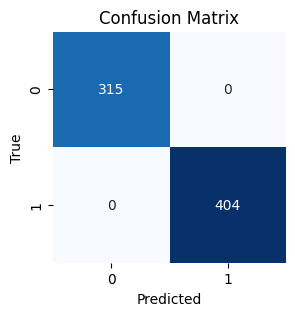

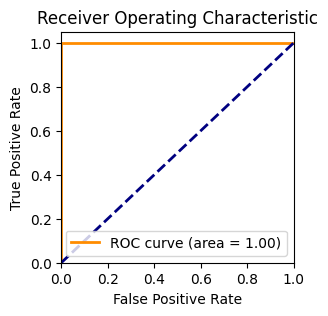

In [ ]:
import xgboost as xgb
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score,
    balanced_accuracy_score, log_loss, precision_score, recall_score, f1_score
)
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize XGBoost with default parameters
xgb_baseline = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Train the model
xgb_baseline.fit(X_train, y_train)

# Predict on training data
y_train_pred = xgb_baseline.predict(X_train)
y_train_proba = xgb_baseline.predict_proba(X_train)[:, 1]

# Calculate metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
train_balanced_accuracy = balanced_accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_roc_auc = roc_auc_score(y_train, y_train_proba)
train_log_loss = log_loss(y_train, y_train_proba)
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
train_classification_report = classification_report(y_train, y_train_pred)

# Print metrics
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Training Balanced Accuracy: {train_balanced_accuracy:.4f}")
print(f"Training Precision: {train_precision:.4f}")
print(f"Training Recall: {train_recall:.4f}")
print(f"Training F1 Score: {train_f1:.4f}")
print(f"Training ROC AUC: {train_roc_auc:.4f}")
print(f"Training Log Loss: {train_log_loss:.4f}")
print("\nTraining Classification Report:")
print(train_classification_report)
print("\nTraining Confusion Matrix:")
print(train_conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(3, 3))
sns.heatmap(train_conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_train, y_train_proba)
plt.figure(figsize=(3, 3))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % train_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## 3. Model Validation: Cross Validation & Hyperparameter Tuning (Validation Set)

We proceed with cross-validation and hyperparameter tuning to enhance our model's performance.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 1]
}

# Initialize GridSearchCV with the XGBoost classifier
xgb_grid_search = GridSearchCV(
    estimator=xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    param_grid=param_grid,
    scoring='accuracy',
    cv=10
)

# Perform the grid search on the validation data
xgb_grid_search.fit(X_val, y_val)

# Output the best parameters and the highest cross validation accuracy
best_params = xgb_grid_search.best_params_
best_score = xgb_grid_search.best_score_
print(f"Best Parameters: {best_params}")
print(f"Best Cross Validation Accuracy: {best_score:.4f}")

Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 1}
Best Cross Validation Accuracy: 0.9000


## 4. Model Evaluation (Test Set)

We assess the tuned model's performance on the test set using a comprehensive set of metrics and visualize the results with equally sized plots for the confusion matrix and the ROC curve.

Test Accuracy: 0.8667
Test Balanced Accuracy: 0.8667
Test Precision: 0.9231
Test Recall: 0.8000
Test F1 Score: 0.8571
Test ROC AUC: 0.9398
Test Log Loss: 0.3353

Test Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.93      0.87        45
         1.0       0.92      0.80      0.86        45

    accuracy                           0.87        90
   macro avg       0.87      0.87      0.87        90
weighted avg       0.87      0.87      0.87        90


Test Confusion Matrix:


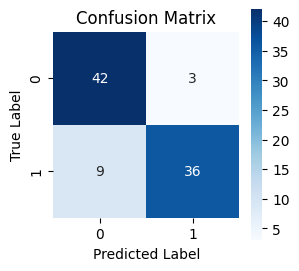


Test ROC AUC Curve:


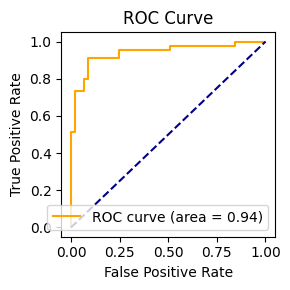

In [ ]:
import xgboost as xgb
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score,
    balanced_accuracy_score, log_loss, precision_score, recall_score, f1_score
)
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming xgb_grid_search is your trained GridSearchCV object and X_test, y_test are defined

# Use the best estimator from the grid search to make predictions on the test data
y_test_pred = xgb_grid_search.best_estimator_.predict(X_test)
y_test_proba = xgb_grid_search.best_estimator_.predict_proba(X_test)[:, 1]

# Compute various evaluation metrics for the test data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_balanced_accuracy = balanced_accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_proba)
test_log_loss = log_loss(y_test, y_test_proba)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
test_classification_report = classification_report(y_test, y_test_pred)

# Display the evaluation metrics for the test set
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Balanced Accuracy: {test_balanced_accuracy:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test F1 Score: {test_f1:.4f}")
print(f"Test ROC AUC: {test_roc_auc:.4f}")
print(f"Test Log Loss: {test_log_loss:.4f}")
print("\nTest Classification Report:")
print(test_classification_report)

# Plot the confusion matrix
print("\nTest Confusion Matrix:")
plt.figure(figsize=(3, 3))
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues', square=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Plot the ROC curve
print("\nTest ROC AUC Curve:")
plt.figure(figsize=(3, 3))
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
plt.plot(fpr, tpr, color='orange', label=f'ROC curve (area = {test_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.tight_layout()  # Adjust layout to prevent clipping of ylabel/title
plt.show()

## 5. Model Interpretability/Explainability

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
[01:39:33] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


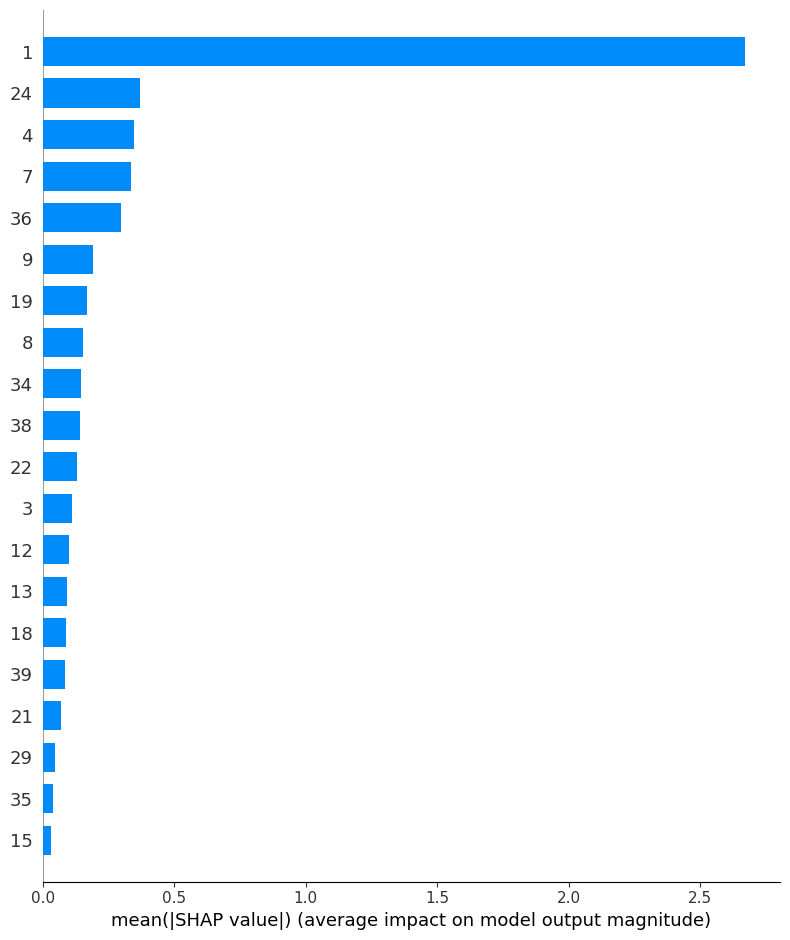

In [ ]:
import shap

# Create a SHAP explainer object
explainer = shap.TreeExplainer(xgb_grid_search.best_estimator_)
shap_values = explainer.shap_values(X_test)

# Visualize the SHAP values
shap.summary_plot(shap_values, X_test, plot_type="bar")

## 6. Limitations and Future Work

### Limitations

1. Interpretability with PCA: It's important to note that while we can understand which components are important, the interpretability of the model is less clear than with models trained on the original features. This is because the principal components often do not represent intuitive or meaningful concepts, especially if the PCA loadings are complex or if many original features contribute to each principal component.

2. Complexity and Interpretability: XGBoost is a gradient boosting algorithm that can build very complex models. While this complexity can capture intricate patterns in the data, it also makes the model difficult to interpret. This is especially critical in healthcare, where understanding the reasoning behind a diagnosis is as important as the diagnosis itself.

3. Overfitting: Despite having built-in mechanisms to prevent overfitting (like regularization), XGBoost models can still overfit, particularly when the dataset is small, which is often the case in medical datasets due to the difficulty and expense of data collection.

4. Imbalanced Data: Medical datasets often have imbalanced classes, with many more negative cases (no disease) than positive cases (disease). XGBoost needs more careful tuning, such as adjusting the scale_pos_weight parameter, to handle imbalance appropriately.

5. Noise and Outliers: Medical data can contain noise and outliers due to errors in data collection or unusual patient cases. XGBoost can be sensitive to noise and outliers, which can affect the model's performance and generalizability.

6. Small Data Challenges: The UCI Heart Disease dataset is relatively small. XGBoost models, which are powerful and capable of fitting complex patterns, can potentially model the "noise" instead of the "signal," leading to a model that doesn't generalize well to new data.

7. Updates and Maintenance: The model's performance may degrade over time as the nature of diseases, diagnostic procedures, and population demographics change. Regular updates and retraining with new data are essential, which can be challenging in a rapidly evolving medical field.